## Keşifçi Veri Analizi | Becerileri Pekiştirme

Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [21]:
df = pd.read_csv('iris.csv')

Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [22]:
print(df.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [23]:
# Öznitelik sayısını buluyoruz
num_of_features = df.shape[1]
print("Öznitelik sayısı: ", num_of_features)

# Gözlem sayısını buluyoruz
num_of_samples = df.shape[0]
print("Gözlem sayısı: ", num_of_samples)

Öznitelik sayısı:  5
Gözlem sayısı:  150


Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [28]:
print(df.describe())


       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [29]:
print(df.isnull().sum())

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.

En güçlü pozitif ilişki hangi iki değişken arasındadır?

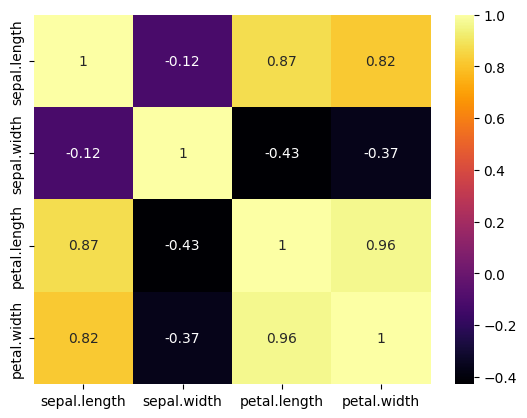

In [41]:
# Sadece sayısal değişkenleri seçiyoruz
num_df = df.select_dtypes(include=['float64', 'int64'])

# Sayısal değişkenler arasındaki korelasyon matrisini çizdirme
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='inferno')
plt.show()

Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

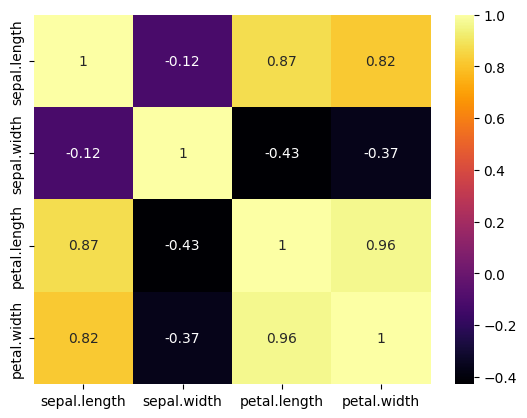

In [42]:

sns.heatmap(corr_matrix, annot=True, cmap='inferno')
plt.show()

Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.

In [43]:
print(df['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']


Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.

In [44]:
print(df['variety'].nunique())

3


Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

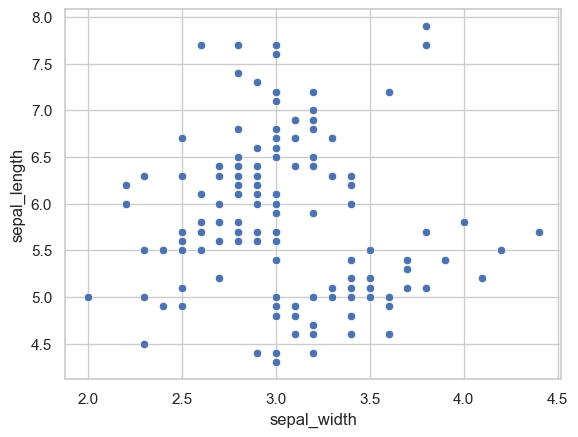

In [111]:
import seaborn as sns

sns.scatterplot(x="sepal_width", y="sepal_length", data=iris)


Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim. 

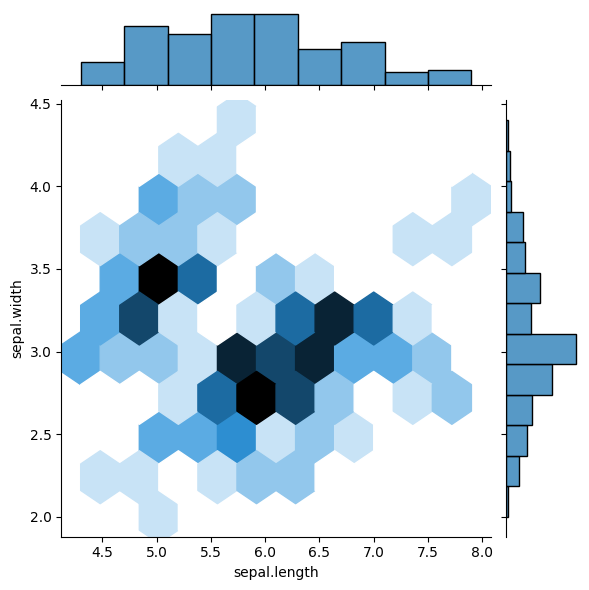

In [46]:
# jointplot oluşturma
sns.jointplot(x='sepal.length', y='sepal.width', data=df, kind='hex')

# grafiği gösterme
plt.show()

Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "variety" parametresi ile hedef değişkenine göre kırdıralım. 

3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.

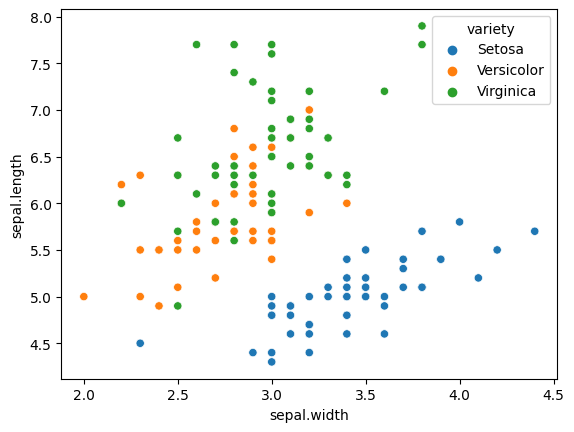

In [47]:
sns.scatterplot(data=df, x='sepal.width', y='sepal.length', hue='variety')
plt.show()

#3 farklı renk arasında sepal değişkenleri ile kümeleme yapılabilir. 
#Ancak kümeler biraz karışık (küme yerleri) da görünebilir.  

value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım. 

In [48]:
print(df["variety"].value_counts())
#Aynı değerler verildiği için çerçevemizin dengeli olduğu görülüyor.

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin. 

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

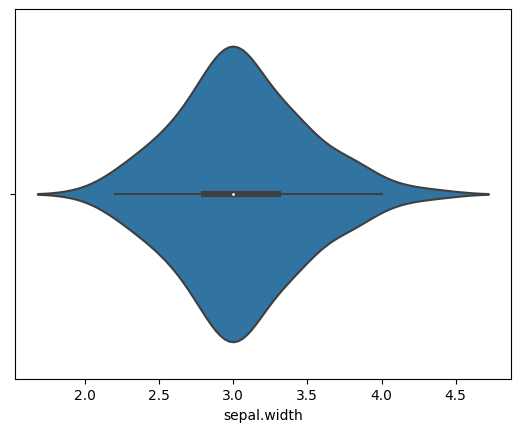

In [49]:
sns.violinplot(x="sepal.width", data=df)
plt.show()

#Bu grafik bize dağılımın simetrik olup olmadığını gösterir. 
#Ortaya çıkan şekilde grafiğin sağ ve sol tarafları simetrik görünüyor.
#Direk olarak normal dağılım diyemesek de normal dağılıma benzer bir dağılımdır.

Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.

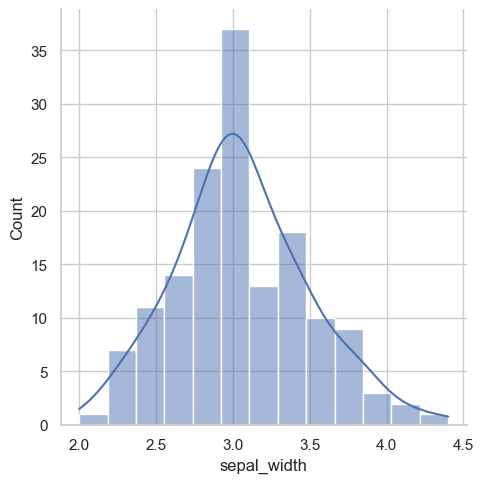

In [112]:
sns.displot(iris['sepal_width'], kde=True)
plt.show()


Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

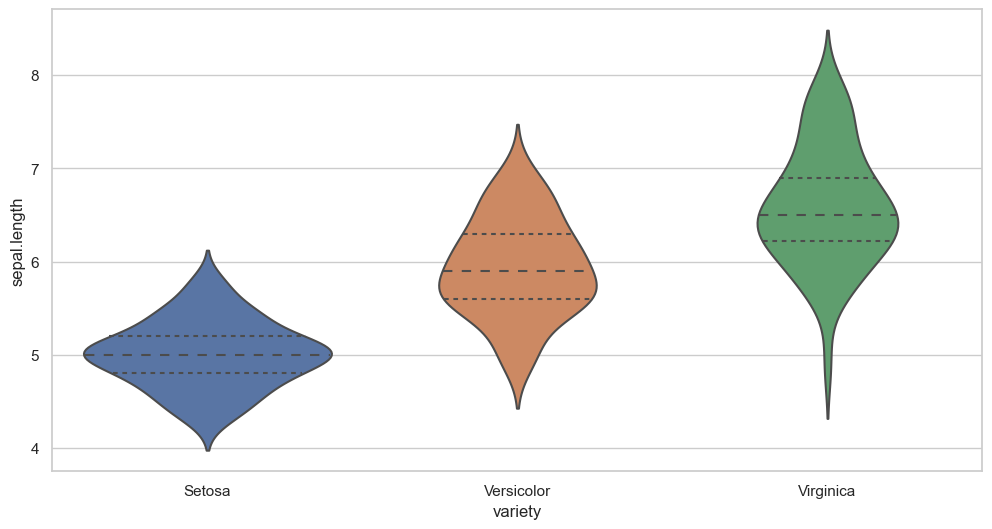

In [51]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12,6))

sns.violinplot(x="variety", y="sepal.length", data=df, ax=ax, inner="quartile")

plt.show()

Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?

50 x 3 olduğunu ve dengeli olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna variety parametresini vereilm.

<Axes: xlabel='variety', ylabel='count'>

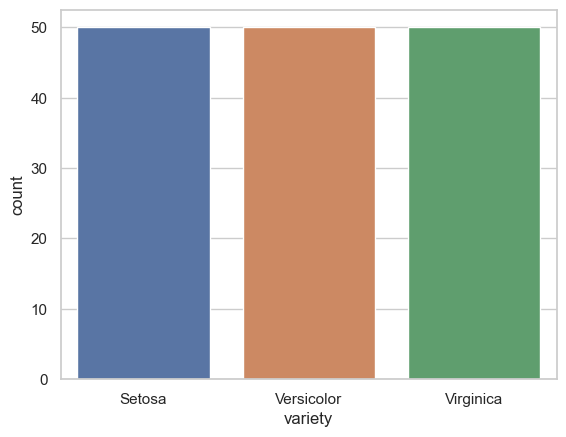

In [52]:
#Yukarıda yazmış olduğumuz kod ile her bir türden 50 adet gözlem olduğunu bulmuştuk.
#Setosa        50 // Versicolor    50 // Virginica     50
sns.countplot(x='variety', data=df)

sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.

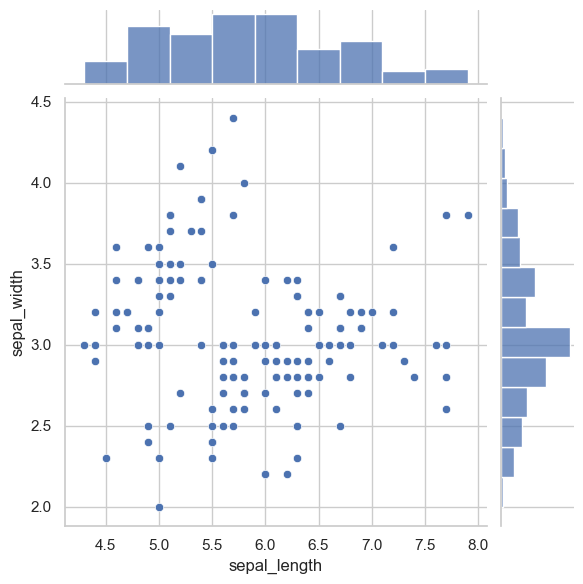

In [63]:
df = sns.load_dataset('iris')
sns.jointplot(x="sepal_length", y="sepal_width", data=df)

Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

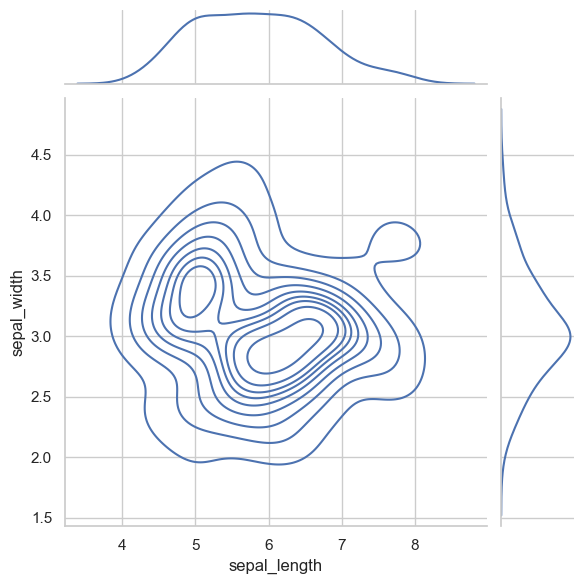

In [68]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")


scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.

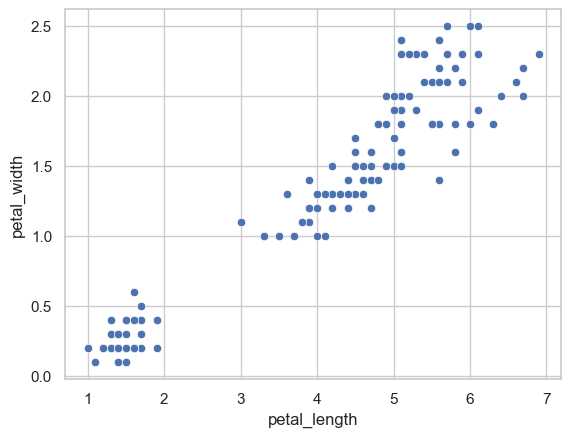

In [69]:
iris = sns.load_dataset('iris')
sns.scatterplot(data=iris, x="petal_length", y="petal_width")
plt.show()

Aynı görselleştirmeye hue = "variety" parametresini ekleyerek 3. bir boyut verelim.

<Axes: xlabel='petal_length', ylabel='petal_width'>

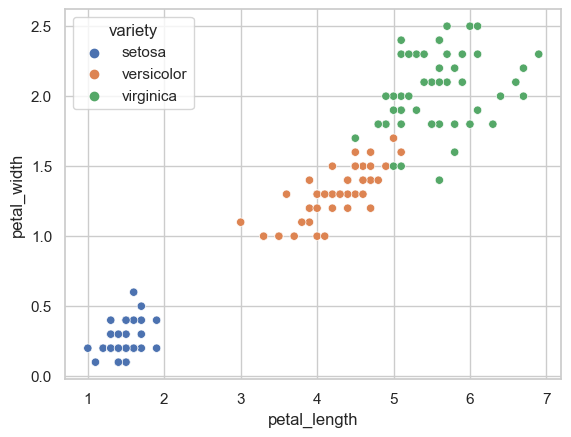

In [101]:
iris["variety"] = df["species"]
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="variety")

sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim. Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.

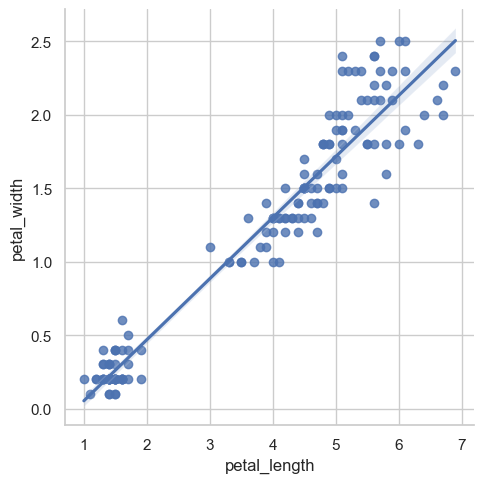

In [83]:
sns.lmplot(x="petal_length", y="petal_width", data=iris)
#iki değer de birlikte arttığı için  pozitif bir ilişki vardır.
#Noktalar birbirine yakın olduğu için de ilişki güçlü diyebiliriz.

Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım. 

In [86]:
#Katsayı 1'e yakın ise > güçlü pozitif
#Katsayı -1'e yakın ise > güçlü negatif
#Katsayı 0'a yakın ise > ilişki yok & zayıf

correlation = iris['petal_length'].corr(iris['petal_width'])
print("korelasyon katsayısı:", correlation)

korelasyon katsayısı: 0.9628654314027963


Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.

In [115]:
iris["total_length"] = iris["petal_length"] + iris["sepal_length"]
print(iris["total_length"])

0       6.5
1       6.3
2       6.0
3       6.1
4       6.4
       ... 
145    11.9
146    11.3
147    11.7
148    11.6
149    11.0
Name: total_length, Length: 150, dtype: float64


total.length'in ortalama değerini yazdıralım. 

In [118]:
print(iris["total_length"].mean())

9.601333333333333


total.length'in standart sapma değerini yazdıralım.

In [119]:
print(iris["total_length"].std())

2.5200401260965


sepal.length'in maksimum değerini yazdıralım.

In [96]:
print(iris["sepal_length"].max())

7.9


sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.

In [102]:
# filtreleyelim önce
setosa_filter = (iris["sepal_length"] > 5.5) & (iris["variety"] == "setosa")
setosa_5_5 = iris[setosa_filter]

# sonuçları yazdırma
print(setosa_5_5)


    sepal_length  sepal_width  petal_length  petal_width species variety
14           5.8          4.0           1.2          0.2  setosa  setosa
15           5.7          4.4           1.5          0.4  setosa  setosa
18           5.7          3.8           1.7          0.3  setosa  setosa


petal.length'i 5'den küçük ve türü virginica olan gözlemlerin sadece sepal.length ve sepal.width değişkenlerini ve değerlerini yazdıralım.

In [104]:
filtered_data = iris[(iris["petal_length"] < 5) & (iris["variety"] == "virginica") & (iris["sepal_length"] > 5.5)]
selected_data = filtered_data[["sepal_length", "sepal_width"]]
print(selected_data)


     sepal_length  sepal_width
121           5.6          2.8
123           6.3          2.7
126           6.2          2.8
127           6.1          3.0
138           6.0          3.0


Hedef değişkenimiz variety'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.

In [134]:
iris.groupby("species").mean()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım. 

In [110]:
iris = sns.load_dataset("iris")
std_by_variety = iris.groupby("species")["petal_length"].apply(np.std)
print(std_by_variety)

species
setosa        0.171919
versicolor    0.465188
virginica     0.546348
Name: petal_length, dtype: float64


Emeğiniz, ayırdığınız vakit ve ilginiz için teşekkürler.